# Data Processing

In [3]:
import pandas as pd
import os

# Path to the folder containing your CSV files
folder_path = r'C:\Users\AkselDindisyan\Desktop\3.1 Junior\CS 210\Proje\my-step-count-analysis\Takeout\Fit\Günlük aktivite metrikleri'

# Initialize an empty list to store daily step data
daily_steps_list = []

# Iterate through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):  # Process only CSV files
        file_path = os.path.join(folder_path, file)
        
        # Load the CSV file
        data_long_period = pd.read_csv(file_path)
        
        # Ensure 'Adım sayısı' (Step Count) is numeric
        data_long_period['Adım sayısı'] = pd.to_numeric(data_long_period['Adım sayısı'], errors='coerce')
        
        # Calculate total steps for the file
        total_steps = data_long_period['Adım sayısı'].sum()
        
        # Extract the date from the file name or content (assumes date is part of the file name)
        date = file.replace('.csv', '')  # Adjust if necessary
        
        # Append to the list
        daily_steps_list.append({'Date': date, 'Total Steps': total_steps})

# Create a DataFrame with aggregated data
daily_steps_df = pd.DataFrame(daily_steps_list)

# Save the result to a single CSV file
output_path = os.path.join(folder_path, 'aggregated_daily_steps.csv')
daily_steps_df.to_csv(output_path, index=False)

print(f"Aggregated steps saved to {output_path}")


Aggregated steps saved to C:\Users\AkselDindisyan\Desktop\3.1 Junior\CS 210\Proje\my-step-count-analysis\Takeout\Fit\Günlük aktivite metrikleri\aggregated_daily_steps.csv


In [50]:
import xml.etree.ElementTree as ET
from openpyxl import Workbook
from collections import defaultdict
from datetime import datetime

def extract_steps_to_xlsx(xml_file, xlsx_file, group_by="daily"):
    """
    Extracts step data from an Apple Health XML file and writes it to an Excel file.

    Args:
        xml_file (str): Path to the XML file.
        xlsx_file (str): Path to the output Excel file.
        group_by (str): "daily" or "hourly" to group step counts by day or hour.
    """
    # Parse XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Create a dictionary to store step counts
    step_data = defaultdict(int)

    # Extract step records
    for record in root.findall("Record"):
        if record.attrib.get("type") == "HKQuantityTypeIdentifierStepCount":
            # Extract date and step count value
            start_date = record.attrib.get("startDate")
            steps = int(float(record.attrib.get("value")))

            # Parse the timestamp
            date_time = datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S %z")

            # Group by day or hour
            if group_by == "daily":
                key = date_time.date()  # Group by date (YYYY-MM-DD)
            elif group_by == "hourly":
                key = date_time.strftime("%Y-%m-%d %H:00")  # Group by hour (YYYY-MM-DD HH:00)
            else:
                raise ValueError("Invalid group_by value. Use 'daily' or 'hourly'.")

            # Aggregate step counts
            step_data[key] += steps

    # Create a new Excel workbook and select the active sheet
    workbook = Workbook()
    sheet = workbook.active

    # Set headers
    headers = ["Date" if group_by == "daily" else "Date & Hour", "Steps"]
    sheet.append(headers)

    # Write step data to Excel
    for key, steps in sorted(step_data.items()):
        sheet.append([key, steps])

    # Save the workbook to the specified file
    workbook.save(xlsx_file)
    print(f"Step data has been successfully written to {xlsx_file}")

# Example usage
extract_steps_to_xlsx(
    "export.xml",
    'Step_Excel_Apple.xlsx',
    group_by="daily"  # Change to "hourly" for hourly grouping and "daily for daily grouping". 
)



Step data has been successfully written to Step_Excel_Apple.xlsx


# Getting Data From Csv

## Get Steps from Android

### Çalış

In [247]:
import pandas as pd

# Path to the CSV file
file_path = 'aggregated_daily_steps.csv'  # Replace with the correct path

# Load the CSV file into a DataFrame
df1 = pd.read_csv(file_path)

# Display the first few rowdf1.head(360)

In [248]:
#Drop last line
df1 = df1[:-1]
#Rename total step to step
df1 = df1.rename(columns={'Total Steps': 'Steps'})

df1.head(360)

,Date,Steps
0,2024-02-11,5677.0
1,2024-02-12,15041.0
2,2024-02-13,6175.0
3,2024-02-14,5797.0
4,2024-02-15,9937.0
...,...,...
327,2025-01-04,3419.0
328,2025-01-05,2307.0
329,2025-01-06,6230.0
330,2025-01-07,5097.0


In [249]:
# Ensure 'Date' is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Filter rows to include only dates on or before 15 December 2024
df1 = df1[df1['Date'] <= pd.Timestamp('2024-12-31')]

# Display the filtered DataFrame
print(df1)


          Date    Steps
0   2024-02-11   5677.0
1   2024-02-12  15041.0
2   2024-02-13   6175.0
3   2024-02-14   5797.0
4   2024-02-15   9937.0
..         ...      ...
319 2024-12-27  12019.0
320 2024-12-28  13150.0
321 2024-12-29   6230.0
322 2024-12-30   5426.0
323 2024-12-31   2371.0

[324 rows x 2 columns]


## Get Steps from Apple

In [250]:
#Plots basic graph

# Load the Excel file
# Replace 'your_health_data.xlsx' with the actual path to your Excel file
df2 = pd.read_excel('Step_Excel_Apple.xlsx')

# Check the data to ensure it loaded correctly
print(df2.head())

# Convert 'Date' column to datetime, if necessary
df2['Date'] = pd.to_datetime(df2['Date'])

        Date  Steps
0 2015-12-16   5829
1 2015-12-17   2589
2 2015-12-18   7136
3 2015-12-19   2697
4 2015-12-20   3864


In [251]:
df2.head(4000)

,Date,Steps
0,2015-12-16,5829
1,2015-12-17,2589
2,2015-12-18,7136
3,2015-12-19,2697
4,2015-12-20,3864
...,...,...
3188,2024-10-24,892
3189,2024-10-25,2034
3190,2024-10-26,377
3191,2024-10-27,3951


In [252]:
#I eliminated th  step counts after I changed my phone
# Convert 'Date' to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])

# Specify the threshold date
upper_threshold_date = pd.Timestamp('2024-02-10')
lower_threshold_date = pd.Timestamp('2016-01-01')

# Drop rows where 'Date' is greater than the threshold date
df2 = df2[df2['Date'] <= upper_threshold_date]
df2 = df2[df2['Date'] >= lower_threshold_date]


# Display the filtered DataFrame
print(df2)

           Date  Steps
16   2016-01-01   3551
17   2016-01-02   4669
18   2016-01-03   3561
19   2016-01-04   6404
20   2016-01-05   7237
...         ...    ...
2936 2024-02-02  12656
2937 2024-02-03   5869
2938 2024-02-04   7160
2939 2024-02-09     75
2940 2024-02-10   3199

[2925 rows x 2 columns]


## Merging Android and Apple Data

In [253]:
#I have created 8 years of step data only in 2016 -2024

# Convert 'Date' columns to datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Merge the two datasets, preserving daily step counts
data_long_period = pd.concat([df1, df2], ignore_index=True)

# Sort by Date
data_long_period = data_long_period.sort_values(by='Date').reset_index(drop=True)

# Save to Excel (optional)
# merged_data.to_excel('Merged_Step_Data.xlsx', index=False)

In [254]:
data_long_period.head(4000)

,Date,Steps
0,2016-01-01,3551.0
1,2016-01-02,4669.0
2,2016-01-03,3561.0
3,2016-01-04,6404.0
4,2016-01-05,7237.0
...,...,...
3244,2024-12-27,12019.0
3245,2024-12-28,13150.0
3246,2024-12-29,6230.0
3247,2024-12-30,5426.0


In [255]:
data_long_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3249 non-null   datetime64[ns]
 1   Steps   3249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


In [256]:
print(data_long_period['Date'].duplicated().sum()) 

0


## Adding Aditional Information

In [257]:
#Plots basic graph

# Load the Excel file
# Replace 'your_health_data.xlsx' with the actual path to your Excel file
df3 = pd.read_excel('Manuel_Data.xlsx')

# Convert 'Date' column to datetime, if necessary
df3['Date'] = pd.to_datetime(df3['Date'])

In [258]:
print(df3.head(100))

         Date  Well Being Sleep Time  Weight  Exams
0  2024-10-05         8.0        NaN     NaN      0
1  2024-10-06         9.0        NaN   71.55      0
2  2024-10-07         8.0   10:00:00     NaN      0
3  2024-10-08         9.0   12:00:00     NaN      0
4  2024-10-09         7.0        NaN     NaN      0
..        ...         ...        ...     ...    ...
67 2024-12-11         7.0   22:00:00     NaN      0
68 2024-12-12         6.5   22:15:00     NaN      1
69 2024-12-13         7.5   22:00:00     NaN      0
70 2024-12-14         5.0   22:30:00     NaN      0
71 2024-12-15         6.5   23:30:00   71.15      0

[72 rows x 5 columns]


## Merge Steps with additional data

In [259]:
import pandas as pd

# Merge the two dataframes on the 'Date' column, keeping only rows with dates in `df3`
data_school_period = pd.merge(data_long_period, df3, on="Date", how="right")

# Display the merged dataframe
print(data_school_period)


         Date    Steps  Well Being Sleep Time  Weight  Exams
0  2024-10-05   6563.0         8.0        NaN     NaN      0
1  2024-10-06  10662.0         9.0        NaN   71.55      0
2  2024-10-07   8374.0         8.0   10:00:00     NaN      0
3  2024-10-08  11740.0         9.0   12:00:00     NaN      0
4  2024-10-09  17448.0         7.0        NaN     NaN      0
..        ...      ...         ...        ...     ...    ...
67 2024-12-11   8594.0         7.0   22:00:00     NaN      0
68 2024-12-12   8927.0         6.5   22:15:00     NaN      1
69 2024-12-13  11308.0         7.5   22:00:00     NaN      0
70 2024-12-14  13544.0         5.0   22:30:00     NaN      0
71 2024-12-15  13995.0         6.5   23:30:00   71.15      0

[72 rows x 6 columns]


In [260]:
import pandas as pd

# Ensure both 'Date' columns are in datetime format
df3['Date'] = pd.to_datetime(df3['Date']).dt.date
data_school_period['Date'] = pd.to_datetime(data_school_period['Date']).dt.date

# Dates in `df3` but not in `data_school_period`
dates_in_df3_not_in_school = df3[~df3['Date'].isin(data_school_period['Date'])]

# Dates in `data_school_period` but not in `df3`
dates_in_school_not_in_df3 = data_school_period[~data_school_period['Date'].isin(df3['Date'])]

# Display results
print("Dates in `df3` but not in `data_school_period`:")
print(dates_in_df3_not_in_school)

print("\nDates in `data_school_period` but not in `df3`:")
print(dates_in_school_not_in_df3)


Dates in `df3` but not in `data_school_period`:
Empty DataFrame
Columns: [Date, Well Being, Sleep Time, Weight, Exams]
Index: []

Dates in `data_school_period` but not in `df3`:
Empty DataFrame
Columns: [Date, Steps, Well Being, Sleep Time, Weight, Exams]
Index: []


In [261]:
# Convert the column and date to datetime (if not already)
data_long_period['Date'] = pd.to_datetime(data_long_period['Date']).dt.date

# Define the date to check
date_to_check = pd.to_datetime('2024-11-20').date()

# Check if the date is in the column
is_date_present = date_to_check in data_long_period['Date'].values
print(f"Is the date {date_to_check} present in the column? {is_date_present}")


Is the date 2024-11-20 present in the column? False


In [262]:
#Check if this date exist
#Because when I do inner loop instead of left loop it gives one less row
#Probably this row doesn't exist my step count excels.
print(data_long_period[data_long_period['Date'] == '2024-11-20'])
print(df1[df1['Date'] == '2024-11-20'])
print(df2[df2['Date'] == '2024-11-20'])

Empty DataFrame
Columns: [Date, Steps]
Index: []
Empty DataFrame
Columns: [Date, Steps]
Index: []
Empty DataFrame
Columns: [Date, Steps]
Index: []


# Explore Data

## Long Period Analysis

In [276]:
data_long_period.head(4000)

,Date,Steps,Year,Month,Day_Type,Season
0,2016-01-01,3551.0,2016,1,Weekday,Other
1,2016-01-02,4669.0,2016,1,Weekend,Other
2,2016-01-03,3561.0,2016,1,Weekend,Other
3,2016-01-04,6404.0,2016,1,Weekday,Other
4,2016-01-05,7237.0,2016,1,Weekday,Other
...,...,...,...,...,...,...
3244,2024-12-27,12019.0,2024,12,Weekday,Other
3245,2024-12-28,13150.0,2024,12,Weekend,Other
3246,2024-12-29,6230.0,2024,12,Weekend,Other
3247,2024-12-30,5426.0,2024,12,Weekday,Other


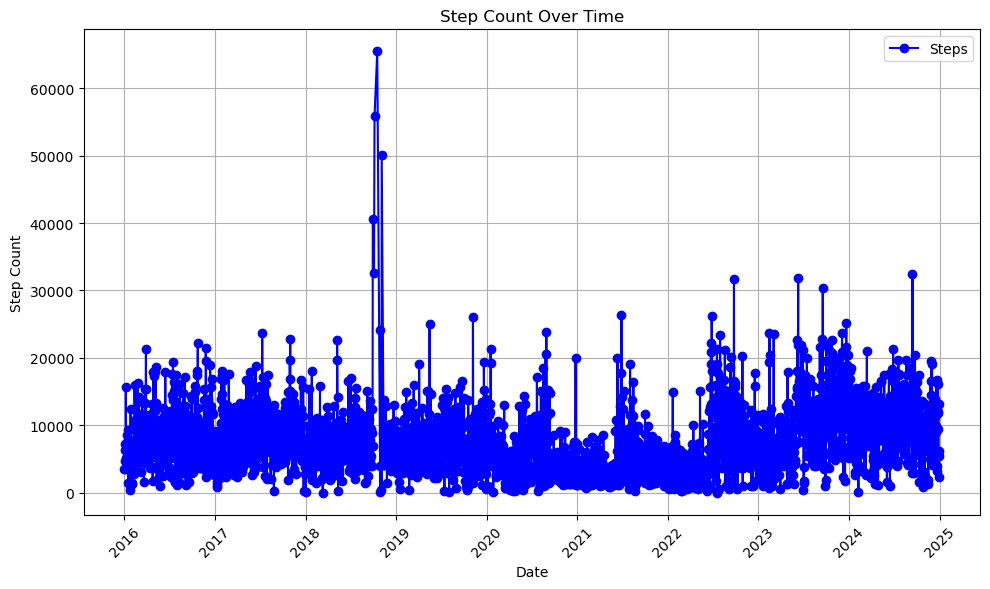

In [263]:
# Ensure 'Date' is in datetime format and drop invalid dates
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'], errors='coerce')

# Drop rows with NaN in the 'Date' column
#data_long_period = data_long_period.dropna(subset=['Date'])

# Plot the step data
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_long_period['Date'], data_long_period['Steps'], marker='o', color='b', label='Steps')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Step Count Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# Detecting Outliers

Identified Outliers:
           Date    Steps
87   2016-03-28  21304.0
127  2016-05-07  18718.0
196  2016-07-15  19409.0
296  2016-10-23  22168.0
328  2016-11-24  21454.0
...         ...      ...
3132 2024-09-05  18546.0
3141 2024-09-14  32484.0
3151 2024-09-24  20423.0
3215 2024-11-28  19495.0
3219 2024-12-02  19179.0

[85 rows x 2 columns]


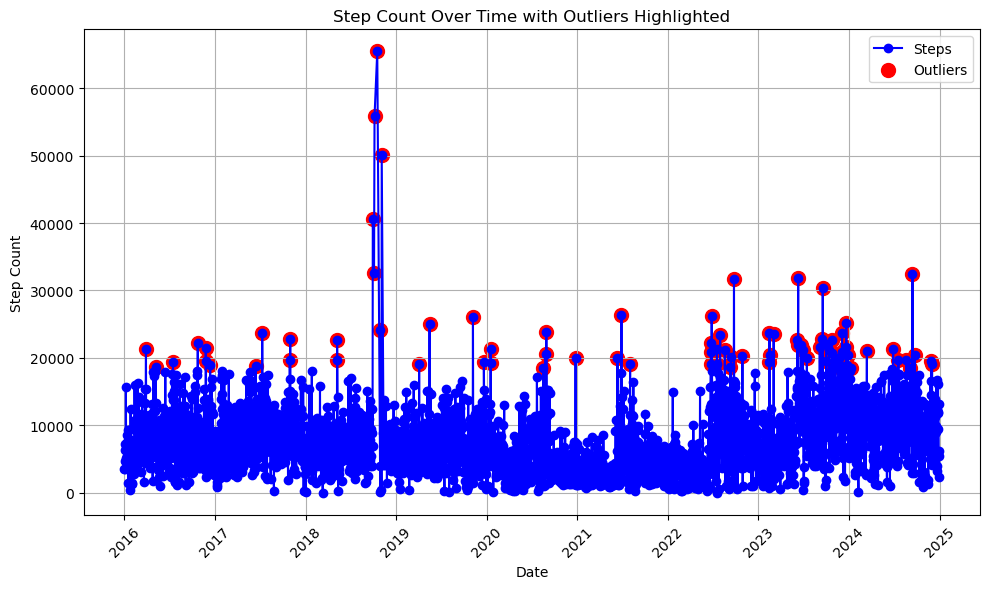

In [264]:
#Finds Outliers
import pandas as pd
import matplotlib.pyplot as plt

# Check the data to ensure it loaded correctly
#print(data_long_period.head())

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_long_period['Steps'].quantile(0.25)
Q3 = data_long_period['Steps'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_long_period[(data_long_period['Steps'] < lower_bound) | (data_long_period['Steps'] > upper_bound)]

# Print outliers
print("Identified Outliers:")
print(outliers)

# Plot the data and highlight outliers
plt.figure(figsize=(10, 6))
plt.plot(data_long_period['Date'], data_long_period['Steps'], marker='o', color='b', label='Steps')
plt.scatter(outliers['Date'], outliers['Steps'], color='r', label='Outliers', s=100)
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Step Count Over Time with Outliers Highlighted')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# Printing Histogram

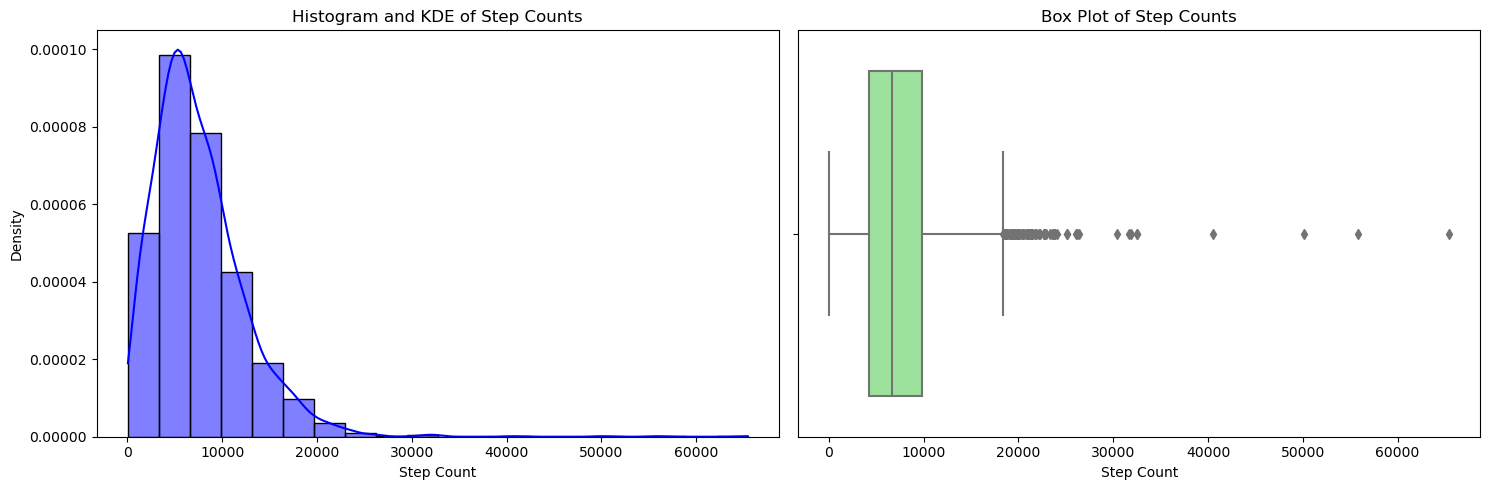

Mean: 7520.62
Standard Deviation: 4848.62
Median: 6641.00


In [277]:
#Step count distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data to ensure it loaded correctly
#print(data_long_period.head())

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Plot the distribution of step counts
plt.figure(figsize=(15, 5))

# Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(data_long_period['Steps'], bins=20, kde=True, color='b', stat='density', alpha=0.5)
plt.title('Histogram and KDE of Step Counts')
plt.xlabel('Step Count')
plt.ylabel('Density')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=data_long_period['Steps'], color='lightgreen')
plt.title('Box Plot of Step Counts')
plt.xlabel('Step Count')

plt.tight_layout()
plt.show()

# Calculate key attributes
mean = data_long_period['Steps'].mean()
std_dev = data_long_period['Steps'].std()
median = data_long_period['Steps'].median()

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Median: {median:.2f}")



## Understanding Data by Years and Months

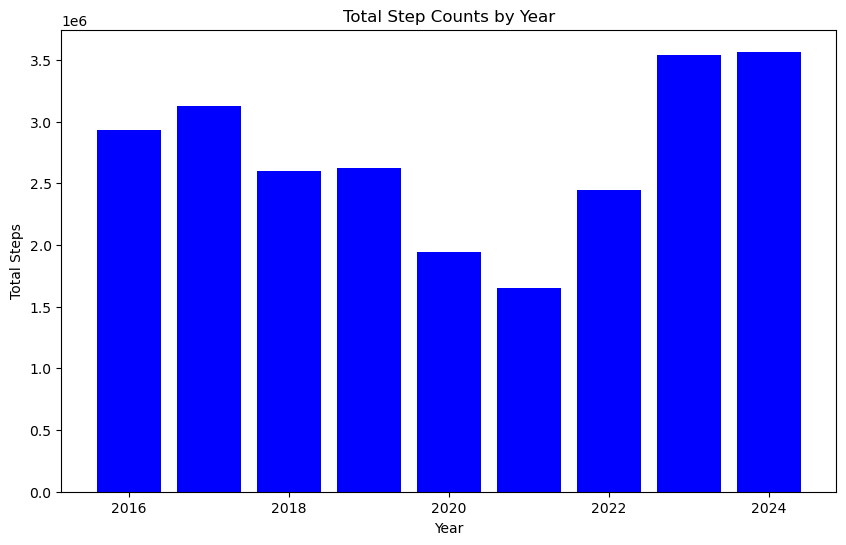

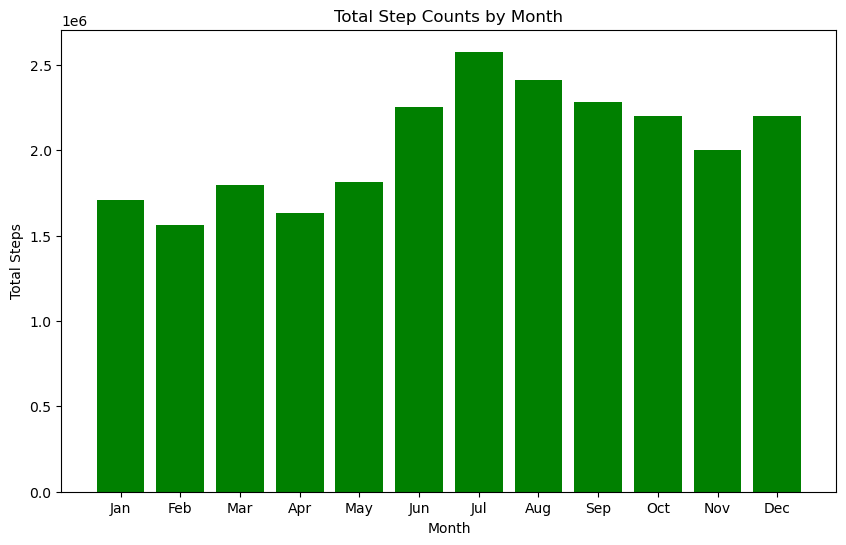

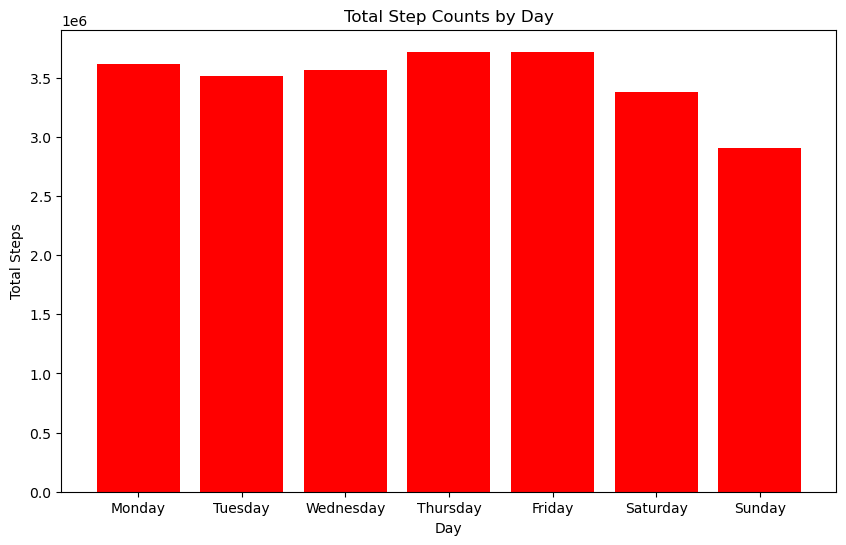

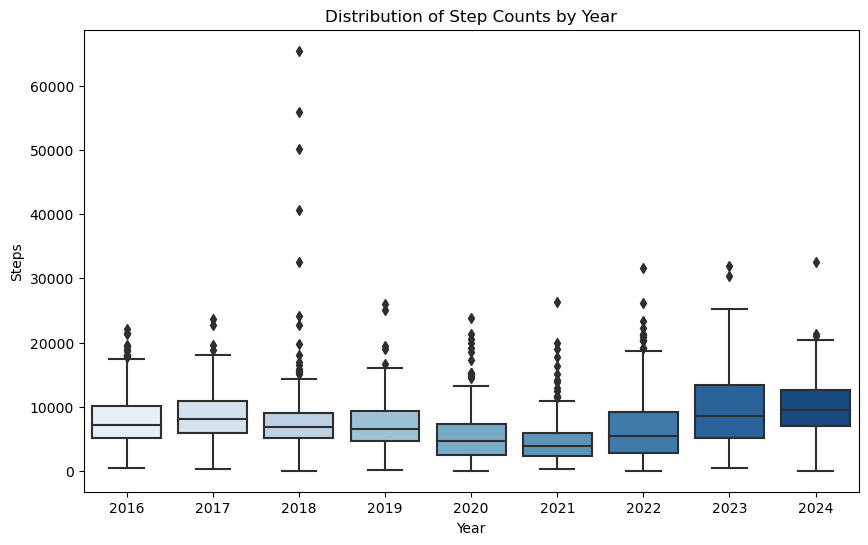

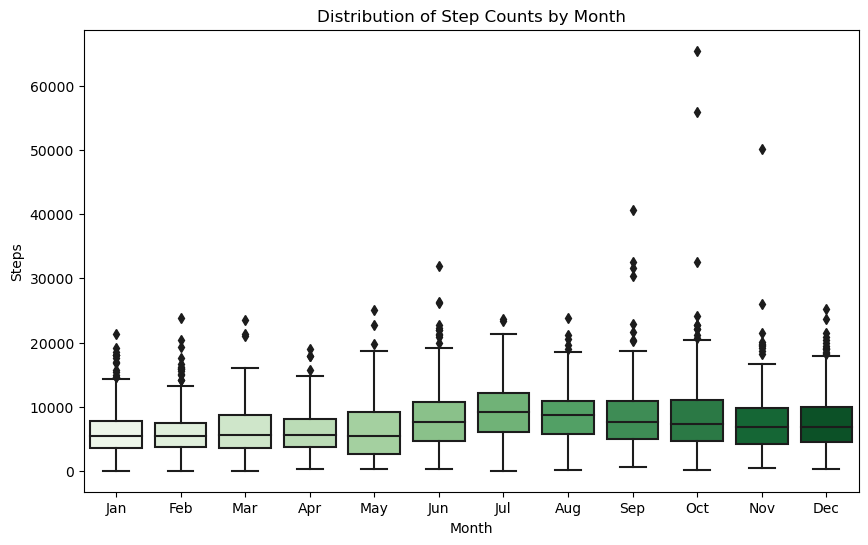

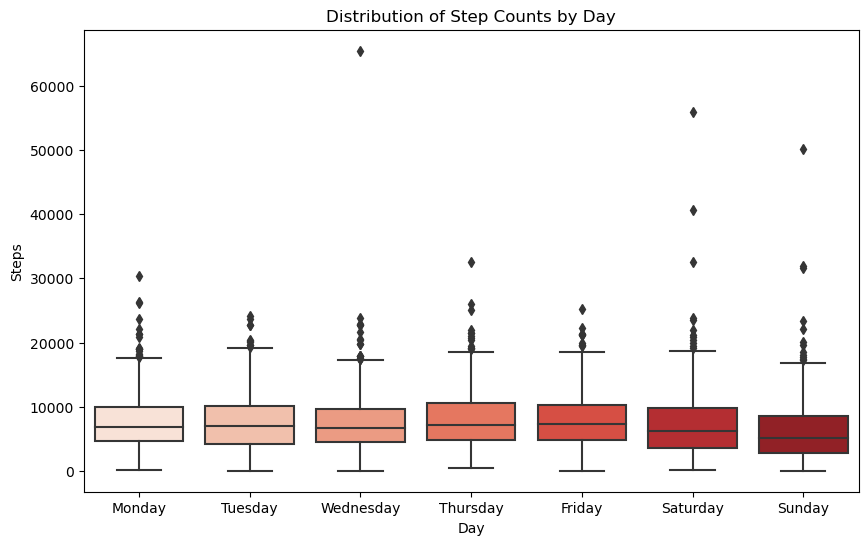

In [283]:
def analyze_and_plot_steps(data):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Ensure 'Date' is in datetime format
    #data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Drop rows with missing 'Steps' or 'Date'
    #data = data.dropna(subset=['Steps', 'Date'])

    # Add 'Year', 'Month', and 'Day' columns
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day_name()

    # Group data
    steps_by_year = data.groupby('Year')['Steps'].sum().reset_index()
    steps_by_month = data.groupby('Month')['Steps'].sum().reset_index()
    steps_by_day = data.groupby('Day')['Steps'].sum().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ]).reset_index()

    # Plot histograms
    plt.figure(figsize=(10, 6))
    plt.bar(steps_by_year['Year'], steps_by_year['Steps'], color='blue')
    plt.title("Total Step Counts by Year")
    plt.xlabel("Year")
    plt.ylabel("Total Steps")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(steps_by_month['Month'], steps_by_month['Steps'], color='green')
    plt.title("Total Step Counts by Month")
    plt.xlabel("Month")
    plt.ylabel("Total Steps")
    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(steps_by_day['Day'], steps_by_day['Steps'], color='red')
    plt.title("Total Step Counts by Day")
    plt.xlabel("Day")
    plt.ylabel("Total Steps")
    plt.show()

    # Plot boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Year'], y=data['Steps'], palette="Blues")
    plt.title("Distribution of Step Counts by Year")
    plt.xlabel("Year")
    plt.ylabel("Steps")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Month'], y=data['Steps'], palette="Greens")
    plt.title("Distribution of Step Counts by Month")
    plt.xlabel("Month")
    plt.ylabel("Steps")
    plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Day'], y=data['Steps'], palette="Reds", order=[
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
    plt.title("Distribution of Step Counts by Day")
    plt.xlabel("Day")
    plt.ylabel("Steps")
    plt.show()

# Example usage
analyze_and_plot_steps(data_long_period)



# Data Analysis

## Weekend vs Weekdays

        Date   Steps  Year  Month
0 2016-01-01  3551.0  2016      1
1 2016-01-02  4669.0  2016      1
2 2016-01-03  3561.0  2016      1
3 2016-01-04  6404.0  2016      1
4 2016-01-05  7237.0  2016      1
Mean Steps on Weekends: 6749.08
Mean Steps on Weekdays: 7830.97

Weekend Standard Deviation: 5222.94
Weekday Standard Deviation: 4654.88

Weekend Median: 5794.00
Weekday Median: 7051.00


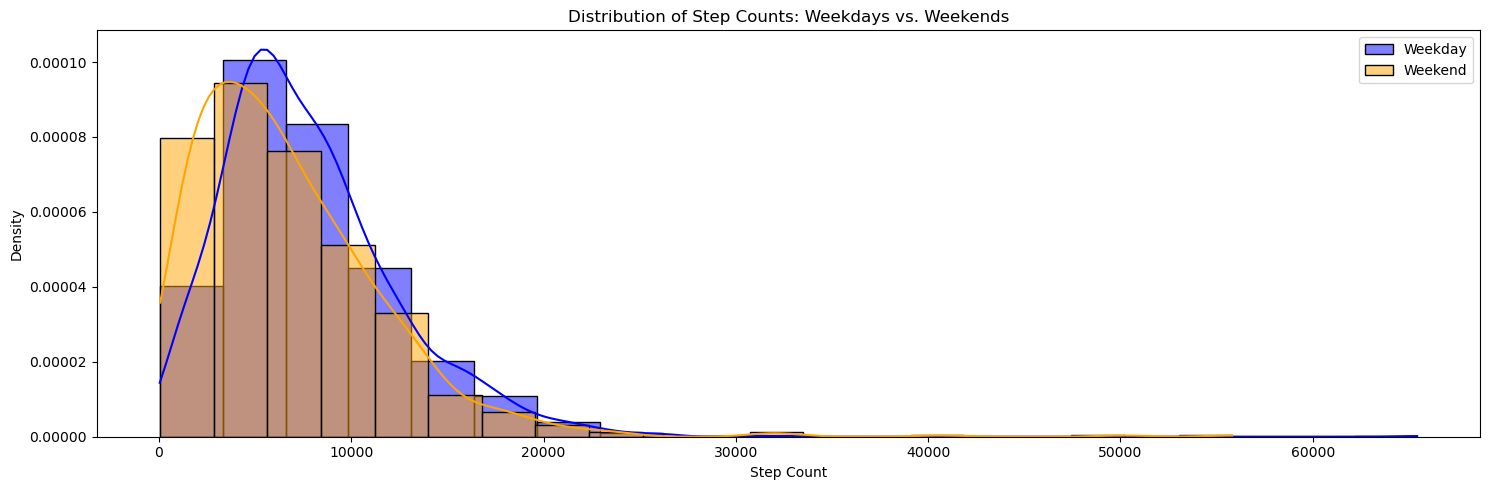

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data to ensure it loaded correctly
print(data_long_period.head())

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Create a new column to identify weekends and weekdays
data_long_period['Day_Type'] = data_long_period['Date'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Calculate mean step counts for weekends and weekdays
mean_weekend = data_long_period[data_long_period['Day_Type'] == 'Weekend']['Steps'].mean()
std_weekend = data_long_period[data_long_period['Day_Type'] == 'Weekend']['Steps'].std()
median_weekend = data_long_period[data_long_period['Day_Type'] == 'Weekend']['Steps'].median()

mean_weekday = data_long_period[data_long_period['Day_Type'] == 'Weekday']['Steps'].mean()
std_weekday = data_long_period[data_long_period['Day_Type'] == 'Weekday']['Steps'].std()
median_weekday = data_long_period[data_long_period['Day_Type'] == 'Weekday']['Steps'].median()

# Display the means, std, medians
print(f"Mean Steps on Weekends: {mean_weekend:.2f}")
print(f"Mean Steps on Weekdays: {mean_weekday:.2f}")
print()
print(f"Weekend Standard Deviation: {std_weekend:.2f}")
print(f"Weekday Standard Deviation: {std_weekday:.2f}")
print()
print(f"Weekend Median: {median_weekend:.2f}")
print(f"Weekday Median: {median_weekday:.2f}")

# Plot the distribution of step counts for weekends and weekdays
plt.figure(figsize=(15, 5))

# Histogram for Weekdays
sns.histplot(data_long_period[data_long_period['Day_Type'] == 'Weekday']['Steps'], bins=20, kde=True, color='blue', label='Weekday', stat='density', alpha=0.5)

# Histogram for Weekends
sns.histplot(data_long_period[data_long_period['Day_Type'] == 'Weekend']['Steps'], bins=20, kde=True, color='orange', label='Weekend', stat='density', alpha=0.5)

# Customize the plot
plt.title('Distribution of Step Counts: Weekdays vs. Weekends')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()







## Summer Holiday vs School Time

        Date   Steps  Year  Month Day_Type
0 2016-01-01  3551.0  2016      1  Weekday
1 2016-01-02  4669.0  2016      1  Weekend
2 2016-01-03  3561.0  2016      1  Weekend
3 2016-01-04  6404.0  2016      1  Weekday
4 2016-01-05  7237.0  2016      1  Weekday
Mean Steps in Summer Months: 8681.25
Mean Steps in Other Months: 6928.98



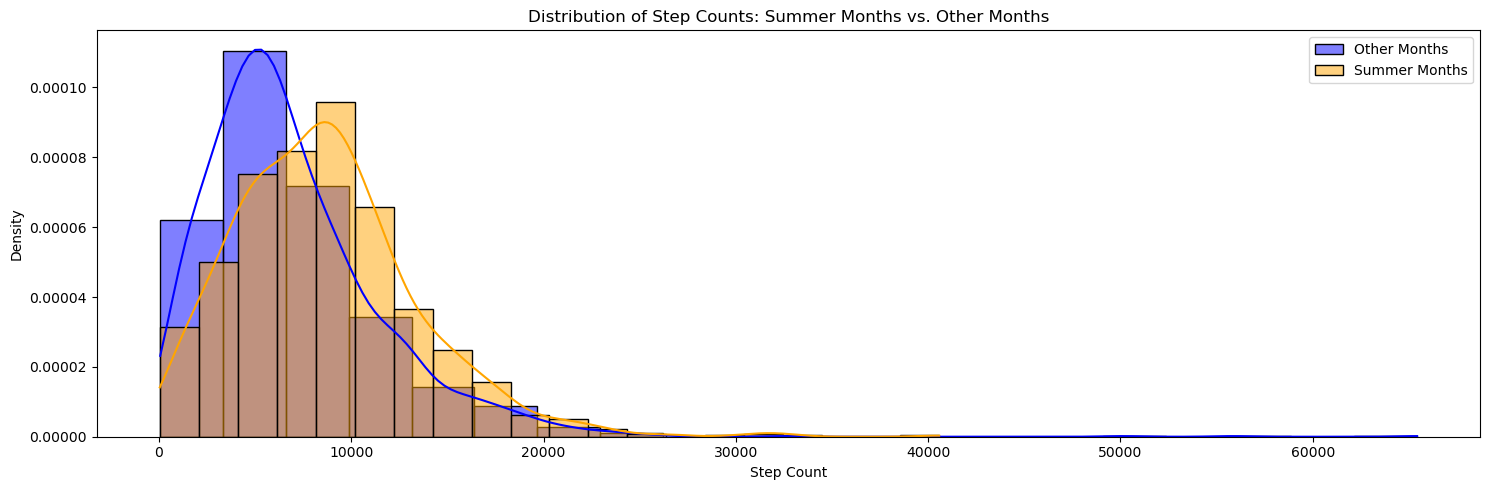

Mean: 7520.62
Standard Deviation: 4848.62
Median: 6641.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Create a new column to identify summer and non-summer months
data_long_period['Season'] = data_long_period['Date'].dt.month.apply(lambda x: 'Summer' if x in [6, 7, 8, 9] else 'Other')

# Calculate mean step counts for summer and other months
mean_summer = data_long_period[data_long_period['Season'] == 'Summer']['Steps'].mean()
mean_other = data_long_period[data_long_period['Season'] == 'Other']['Steps'].mean()

# Display the means
print(f"Mean Steps in Summer Months: {mean_summer:.2f}")
print(f"Mean Steps in Other Months: {mean_other:.2f}")
print()

# Plot the distribution of step counts for summer and other months
plt.figure(figsize=(15, 5))

# Histogram for Other Months
sns.histplot(data_long_period[data_long_period['Season'] == 'Other']['Steps'], bins=20, kde=True, color='blue', label='Other Months', stat='density', alpha=0.5)

# Histogram for Summer Months
sns.histplot(data_long_period[data_long_period['Season'] == 'Summer']['Steps'], bins=20, kde=True, color='orange', label='Summer Months', stat='density', alpha=0.5)

# Customize the plot
plt.title('Distribution of Step Counts: Summer Months vs. Other Months')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate key attributes
mean = data_long_period['Steps'].mean()
std_dev = data_long_period['Steps'].std()
median = data_long_period['Steps'].median()

print(f"Mean: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Median: {median:.2f}")


## Before Uni vs After Uni

## Year and Months

        Date   Steps  Year  Month Day_Type Season
0 2016-01-01  3551.0  2016      1  Weekday  Other
1 2016-01-02  4669.0  2016      1  Weekend  Other
2 2016-01-03  3561.0  2016      1  Weekend  Other
3 2016-01-04  6404.0  2016      1  Weekday  Other
4 2016-01-05  7237.0  2016      1  Weekday  Other
Yearly Step Statistics:
   Year         mean          std  median
0  2016  8006.106557  4102.139244  7185.0
1  2017  8571.534247  3807.729114  8109.0
2  2018  7858.821752  6247.993441  6834.0
3  2019  7184.504110  3664.427358  6489.0
4  2020  5314.153005  3794.253472  4685.0
5  2021  4527.838356  3191.180675  3833.0
6  2022  6703.197260  5161.499478  5522.0
7  2023  9704.276712  5761.003341  8580.0
8  2024  9877.182825  4352.346159  9542.0

Monthly Step Statistics:
    Month         mean          std  median
0       1  6119.691756  3913.677466  5472.0
1       2  6222.111554  3936.958922  5512.0
2       3  6431.810036  3843.197099  5568.0
3       4  6041.574074  3432.626791  5605.0
4       5 

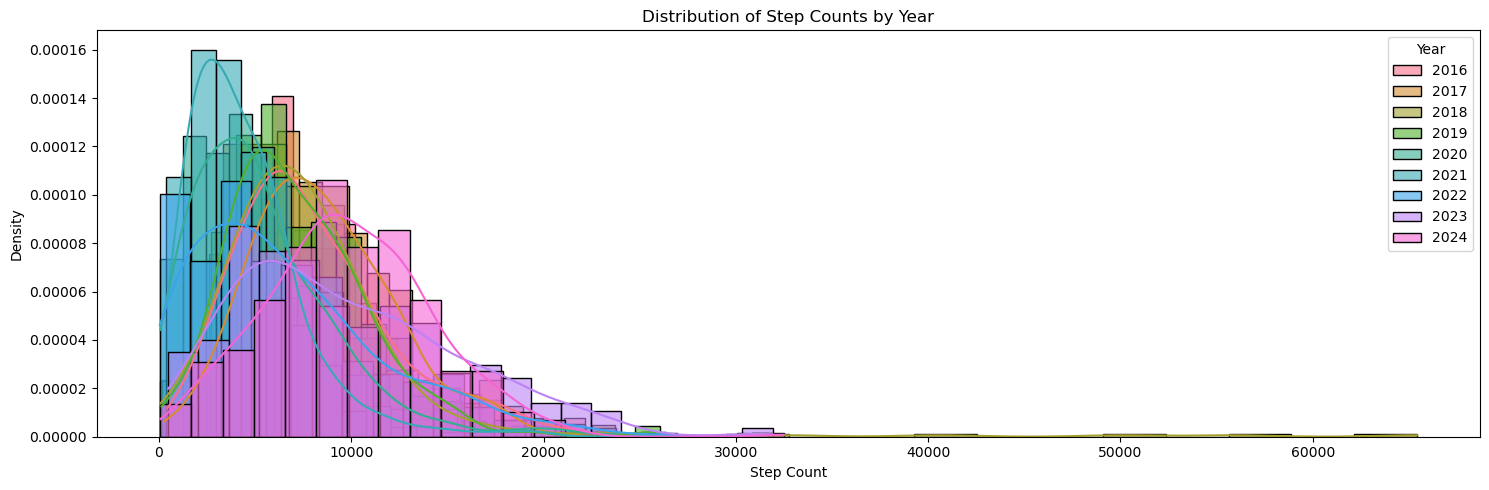

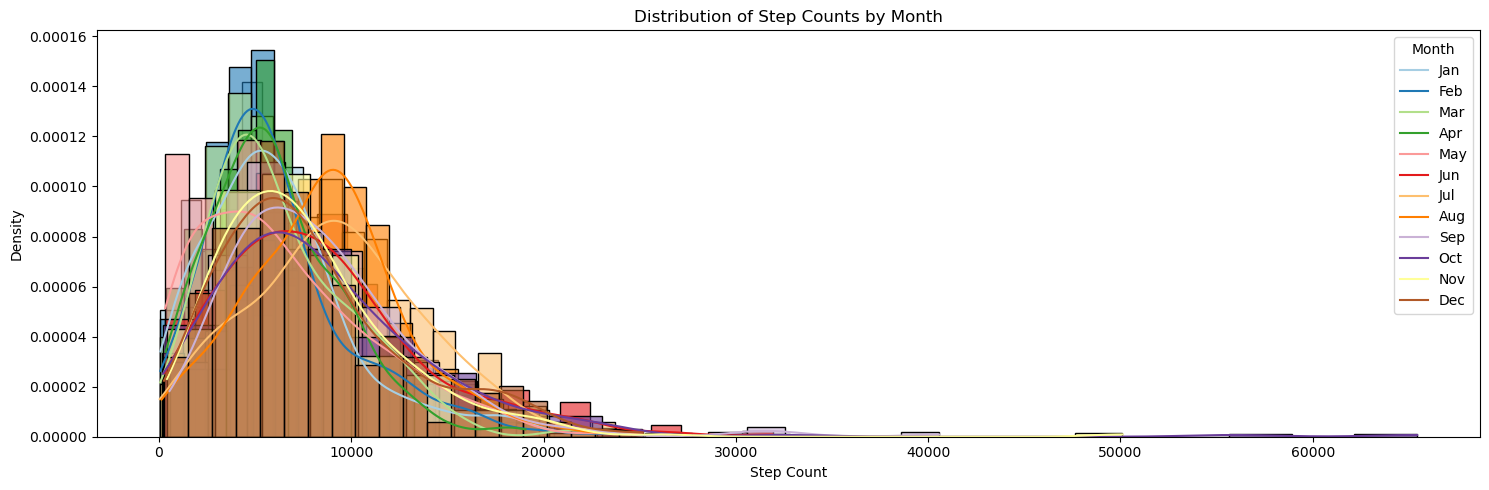

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data to ensure it loaded correctly
print(data_long_period.head())

# Convert 'Date' column to datetime, if necessary
data_long_period['Date'] = pd.to_datetime(data_long_period['Date'])

# Extract Year and Month
data_long_period['Year'] = data_long_period['Date'].dt.year
data_long_period['Month'] = data_long_period['Date'].dt.month

# Calculate mean, std, median for each Year
yearly_stats = data_long_period.groupby('Year')['Steps'].agg(['mean', 'std', 'median']).reset_index()
print("Yearly Step Statistics:")
print(yearly_stats)

# Calculate mean, std, median for each Month (across all years)
monthly_stats = data_long_period.groupby('Month')['Steps'].agg(['mean', 'std', 'median']).reset_index()
print("\nMonthly Step Statistics:")
print(monthly_stats)

# Generate distinct colors for each year
unique_years = data_long_period['Year'].unique()
colors_years = sns.color_palette("husl", len(unique_years))

# Map colors to years
year_color_map = dict(zip(unique_years, colors_years))

# Plot the distribution of step counts for each year
plt.figure(figsize=(15, 5))
for year in unique_years:
    subset = data_long_period[data_long_period['Year'] == year]
    sns.histplot(subset['Steps'], bins=20, kde=True, color=year_color_map[year], label=f"{year}", stat='density', alpha=0.6)

plt.title('Distribution of Step Counts by Year')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend(title='Year', loc='upper right', frameon=True)
plt.tight_layout()
plt.show()

# Generate distinct colors for months
colors_months = sns.color_palette("Paired", 12)

# Plot the distribution of step counts for each month
plt.figure(figsize=(15, 5))
for month in range(1, 13):
    subset = data_long_period[data_long_period['Month'] == month]
    sns.histplot(subset['Steps'], bins=20, kde=True, color=colors_months[month - 1], label=f"{month:02d}", stat='density', alpha=0.6)

plt.title('Distribution of Step Counts by Month')
plt.xlabel('Step Count')
plt.ylabel('Density')
plt.legend(title='Month', loc='upper right', frameon=True, labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.tight_layout()
plt.show()


## School Period Analysis

In [271]:
print(df3.columns)

Index(['Date', 'Well Being', 'Sleep Time', 'Weight', 'Exams'], dtype='object')


In [272]:
import pandas as pd

# Convert 'Date' and 'Sleep Time' to datetime
data_school_period['Date'] = pd.to_datetime(data_school_period['Date'])
data_school_period['Sleep Time'] = pd.to_datetime(data_school_period['Sleep Time'], format='%H:%M:%S', errors='coerce').dt.time

# Adjust sleep times to ensure logical ordering
def adjust_sleep_time(date, start):
    # Skip if 'start' is NaT
    if pd.isnull(start):
        return None
    # Convert start time to datetime object relative to the date
    sleep_datetime = pd.Timestamp.combine(date, start)
    if start < pd.to_datetime('08:00:00').time():  # If time is before 8 AM
        sleep_datetime += pd.Timedelta(days=1)    # Consider it the next day
    return sleep_datetime

# Apply adjustment function
data_school_period['Adjusted Sleep Start'] = data_school_period.apply(
    lambda row: adjust_sleep_time(row['Date'], row['Sleep Time']), axis=1
)

# Output DataFrame
print(data_school_period)


         Date    Steps  Well Being Sleep Time  Weight  Exams  \
0  2024-10-05   6563.0         8.0        NaT     NaN      0   
1  2024-10-06  10662.0         9.0        NaT   71.55      0   
2  2024-10-07   8374.0         8.0   10:00:00     NaN      0   
3  2024-10-08  11740.0         9.0   12:00:00     NaN      0   
4  2024-10-09  17448.0         7.0        NaT     NaN      0   
..        ...      ...         ...        ...     ...    ...   
67 2024-12-11   8594.0         7.0   22:00:00     NaN      0   
68 2024-12-12   8927.0         6.5   22:15:00     NaN      1   
69 2024-12-13  11308.0         7.5   22:00:00     NaN      0   
70 2024-12-14  13544.0         5.0   22:30:00     NaN      0   
71 2024-12-15  13995.0         6.5   23:30:00   71.15      0   

   Adjusted Sleep Start  
0                   NaT  
1                   NaT  
2   2024-10-07 10:00:00  
3   2024-10-08 12:00:00  
4                   NaT  
..                  ...  
67  2024-12-11 22:00:00  
68  2024-12-12 22:15:00

In [273]:
def time_to_hours(dt):
    return dt.hour + dt.minute / 60 + dt.second / 3600 if pd.notnull(dt) else None

data_school_period['Adjusted Sleep Hours'] = data_school_period['Adjusted Sleep Start'].apply(time_to_hours)

In [274]:
import pandas as pd

# Ensure 'Adjusted Sleep Start' is in datetime format
data_school_period['Adjusted Sleep Start'] = pd.to_datetime(data_school_period['Adjusted Sleep Start'], errors='coerce')

# Filter rows where 'Adjusted Sleep Start' is later than 00:00
filtered_df = data_school_period[data_school_period['Adjusted Sleep Start'].dt.time > pd.to_datetime("00:00:00").time()]

# Display the first 100 rows of the filtered dataframe
filtered_df.head(100)


,Date,Steps,Well Being,Sleep Time,Weight,Exams,Adjusted Sleep Start,Adjusted Sleep Hours
2,2024-10-07,8374.0,8.0,10:00:00,NaN,0,2024-10-07 10:00:00,10.00
3,2024-10-08,11740.0,9.0,12:00:00,NaN,0,2024-10-08 12:00:00,12.00
6,2024-10-11,7739.0,6.5,10:30:00,NaN,0,2024-10-11 10:30:00,10.50
7,2024-10-12,1557.0,7.0,02:30:00,NaN,0,2024-10-13 02:30:00,2.50
9,2024-10-14,6566.0,6.0,10:30:00,NaN,0,2024-10-14 10:30:00,10.50
...,...,...,...,...,...,...,...,...
67,2024-12-11,8594.0,7.0,22:00:00,NaN,0,2024-12-11 22:00:00,22.00
68,2024-12-12,8927.0,6.5,22:15:00,NaN,1,2024-12-12 22:15:00,22.25
69,2024-12-13,11308.0,7.5,22:00:00,NaN,0,2024-12-13 22:00:00,22.00
70,2024-12-14,13544.0,5.0,22:30:00,NaN,0,2024-12-14 22:30:00,22.50


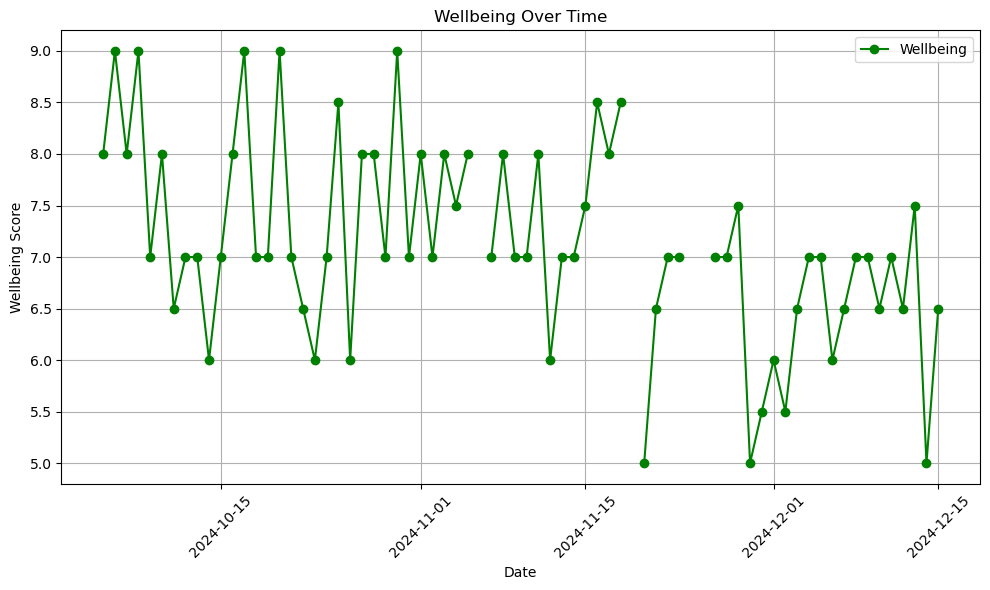

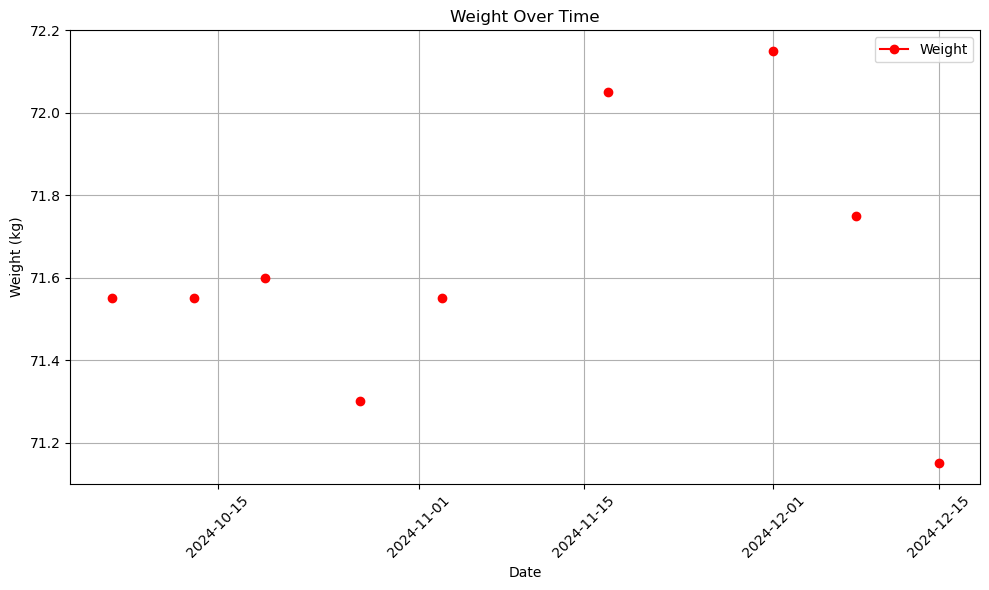

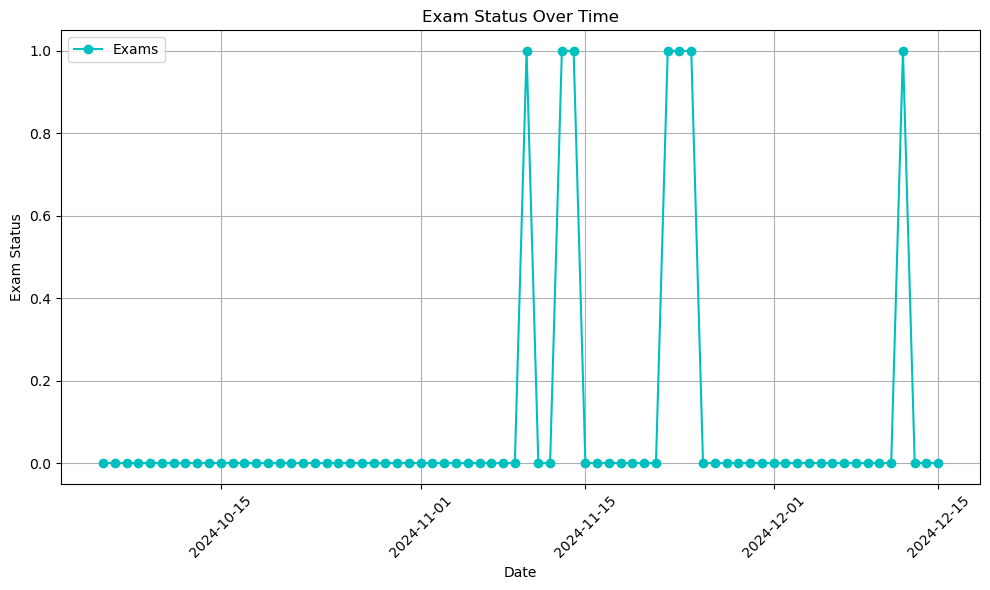

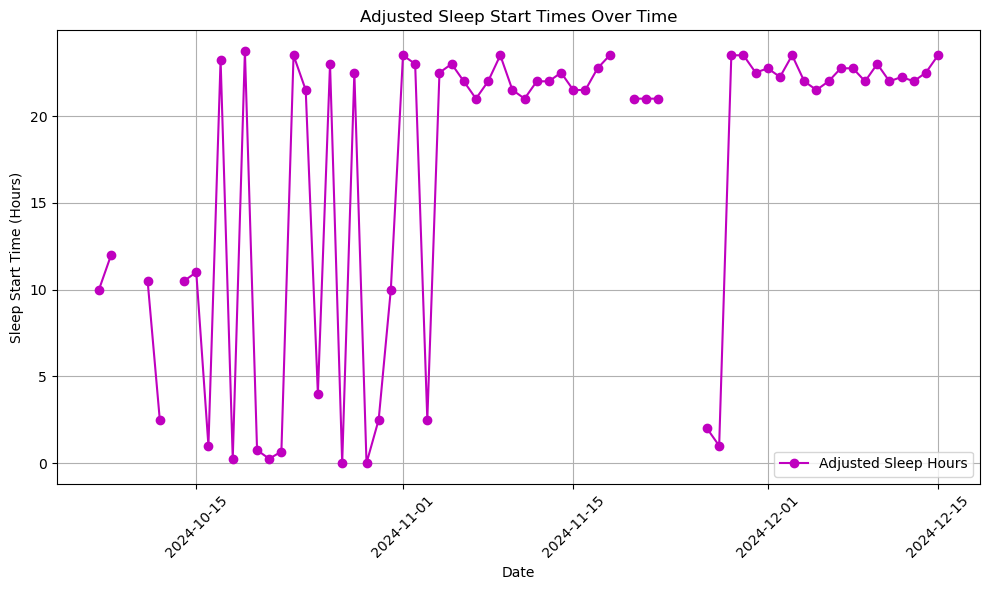

In [275]:
import matplotlib.pyplot as plt

# Wellbeing plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Well Being'], marker='o', color='g', label='Wellbeing')
plt.xlabel('Date')
plt.ylabel('Wellbeing Score')
plt.title('Wellbeing Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Weight plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Weight'], marker='o', color='r', label='Weight')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.title('Weight Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Exam plot
plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Exams'], marker='o', color='c', label='Exams')
plt.xlabel('Date')
plt.ylabel('Exam Status')
plt.title('Exam Status Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_school_period['Date'], data_school_period['Adjusted Sleep Hours'], marker='o', color='m', label='Adjusted Sleep Hours')
plt.xlabel('Date')
plt.ylabel('Sleep Start Time (Hours)')
plt.title('Adjusted Sleep Start Times Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
